In [1]:
import numpy as np
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.metrics import f1_score, recall_score, confusion_matrix, classification_report, precision_recall_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_excel(r"C:\Users\320118090\Desktop\School\Thesis\Data\ContractData.xlsx")

In [3]:
data.dtypes

iCon Type                           object
iCon Market                         object
BG                                  object
Contract Date               datetime64[ns]
Contract Year                        int64
Start Date                  datetime64[ns]
Contract Month                      object
End Date                    datetime64[ns]
Tenure                               int64
Contract End Year                    int64
Reached                              int64
Churn                                int64
Annualized Net Value EUR           float64
Sales Quartile                      object
dtype: object

In [4]:
data.head()

,iCon Type,iCon Market,BG,Contract Date,Contract Year,Start Date,Contract Month,End Date,Tenure,Contract End Year,Reached,Churn,Annualized Net Value EUR,Sales Quartile
0,Wholesaler,JAPAN,CCI,2020-11-12,2020,2021-01-01,January,2021-04-30,4,2021,1,0,25230.26,Q4
1,Wholesaler,JAPAN,CCI,2020-03-13,2020,2020-04-01,April,2021-03-31,12,2021,1,0,29499.94,Q4
2,Wholesaler,JAPAN,CCI,2020-03-10,2020,2020-04-01,April,2021-03-31,12,2021,1,0,53290.21,Q4
3,Wholesaler,JAPAN,CCI,2020-10-13,2020,2020-10-01,October,2021-03-31,6,2021,1,0,16698.95,Q4
4,Wholesaler,JAPAN,MA,2019-05-15,2019,2019-04-01,April,2021-03-31,12,2021,1,0,29459.58,Q4


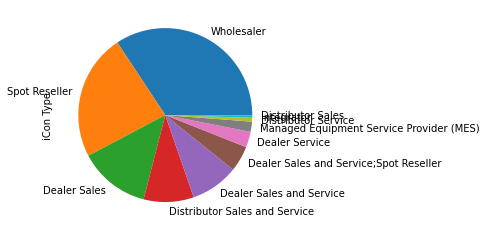

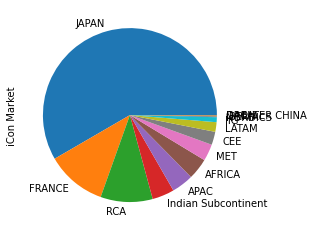

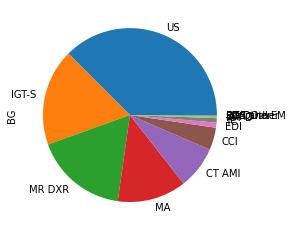

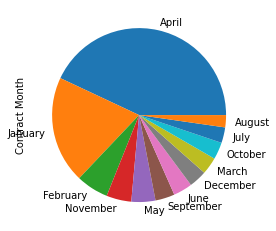

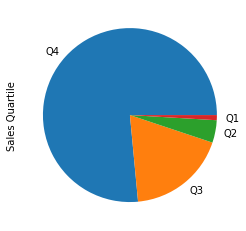

In [5]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie()

In [6]:
data['Contract Year'] = data['Contract Year'].astype(object)

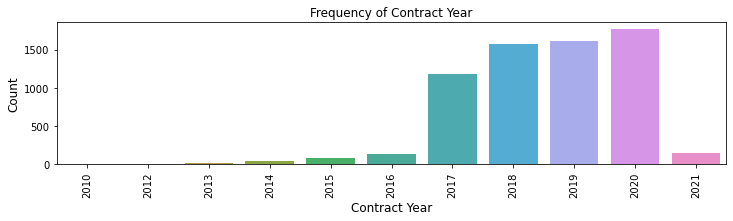

Year Count [(2020, 1766), (2019, 1607), (2018, 1570), (2017, 1180), (2021, 148), (2016, 139), (2015, 83), (2014, 42), (2013, 13), (2010, 9), (2012, 3)]


In [7]:
plt.figure(figsize=(12,12))
plt.subplot(413)
sns.countplot(x="Contract Year", data=data)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Contract Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Contract Year", fontsize=12)
plt.show()
year_count = Counter(data['Contract Year']).most_common()
print("Year Count " +str(year_count))

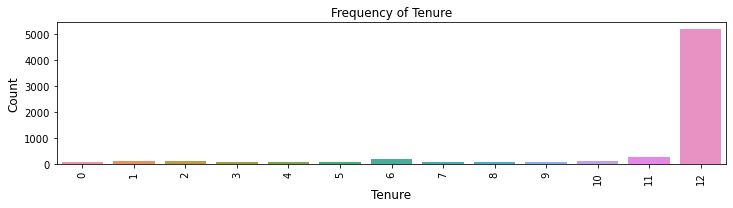

Tenure Count [(12, 5212), (11, 261), (6, 177), (1, 130), (10, 124), (2, 99), (3, 98), (9, 93), (8, 86), (7, 85), (5, 68), (0, 64), (4, 63)]


In [8]:
plt.figure(figsize=(12,12))
plt.subplot(413)
sns.countplot(x="Tenure", data=data)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Tenure', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Tenure", fontsize=12)
plt.show()
tenure_count = Counter(data['Tenure']).most_common()
print("Tenure Count " +str(tenure_count))

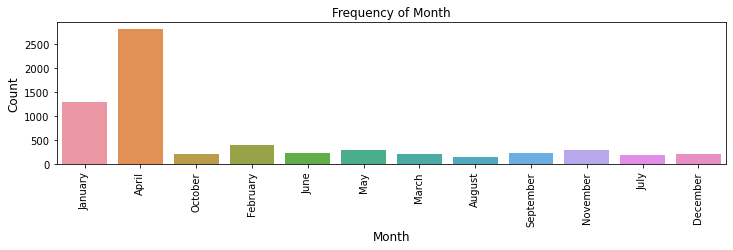

Month Count [('April', 2822), ('January', 1306), ('February', 394), ('November', 304), ('May', 293), ('September', 236), ('June', 232), ('December', 217), ('March', 209), ('October', 208), ('July', 190), ('August', 149)]


In [9]:
plt.figure(figsize=(12,12))
plt.subplot(413)
sns.countplot(x="Contract Month", data=data)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Month", fontsize=12)
plt.show()
month_count = Counter(data['Contract Month']).most_common()
print("Month Count " +str(month_count))

C:\Users\320118090\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annualized Net Value EUR', ylabel='Density'>

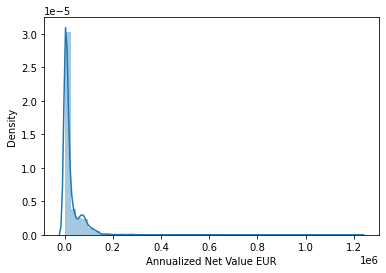

In [10]:
plt.figure()
sns.distplot(data['Annualized Net Value EUR'])

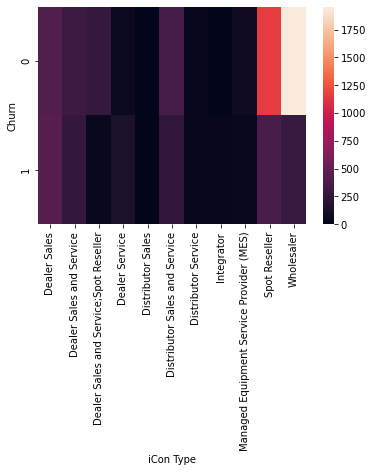

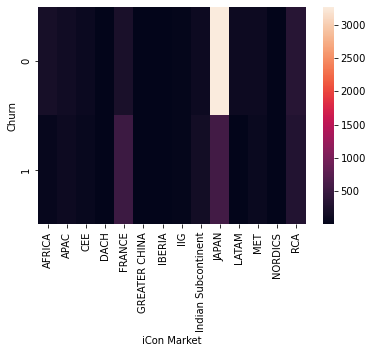

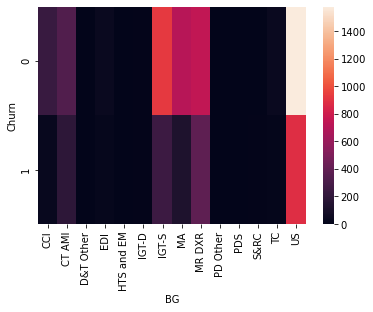

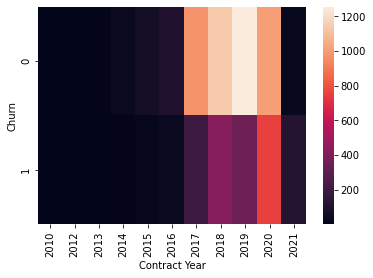

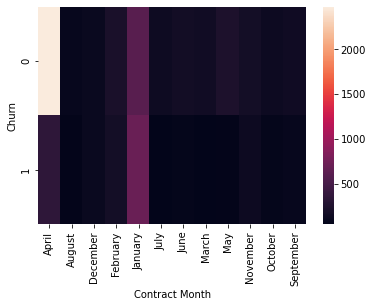

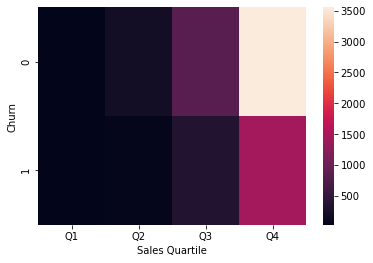

In [11]:
for col in data.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(data['Churn'], data[col]), fmt='d')

In [12]:
target_count = data.Churn.value_counts()

Class 0: 4637
Class 1: 1923
Proportion: 2.41 : 1


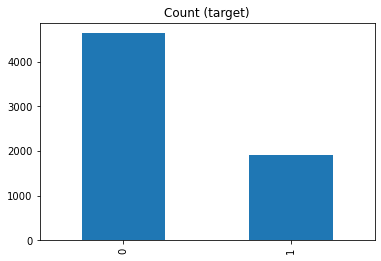

In [13]:

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

# Dummy Encoding

In [14]:
df = data.copy()

In [15]:
df = pd.get_dummies(df,columns=['BG'],prefix='BG')

In [16]:
df = pd.get_dummies(df,columns=['iCon Market'],prefix='iCon Market')

In [17]:
df = pd.get_dummies(df,columns=['iCon Type'],prefix='iCon Type')

In [18]:
df = pd.get_dummies(df,columns=['Contract Year'],prefix='Contract Year')

In [19]:
df = pd.get_dummies(df,columns=['Contract Month'],prefix='Contract Month')

In [20]:
df = pd.get_dummies(df,columns=['Sales Quartile'],prefix='Sales Quartile')

In [21]:
df.dtypes

Contract Date               datetime64[ns]
Start Date                  datetime64[ns]
End Date                    datetime64[ns]
Tenure                               int64
Contract End Year                    int64
                                 ...      
Contract Month_September             uint8
Sales Quartile_Q1                    uint8
Sales Quartile_Q2                    uint8
Sales Quartile_Q3                    uint8
Sales Quartile_Q4                    uint8
Length: 74, dtype: object

In [22]:
for col in df.columns:
    print(col)

Contract Date
Start Date
End Date
Tenure
Contract End Year
Reached
Churn
Annualized Net Value EUR
BG_CCI
BG_CT AMI
BG_D&T Other
BG_EDI
BG_HTS and EM
BG_IGT-D
BG_IGT-S
BG_MA
BG_MR DXR
BG_PD Other
BG_PDS
BG_S&RC
BG_TC
BG_US
iCon Market_AFRICA
iCon Market_APAC
iCon Market_CEE
iCon Market_DACH
iCon Market_FRANCE
iCon Market_GREATER CHINA
iCon Market_IBERIA
iCon Market_IIG
iCon Market_Indian Subcontinent
iCon Market_JAPAN
iCon Market_LATAM
iCon Market_MET
iCon Market_NORDICS
iCon Market_RCA
iCon Type_Dealer Sales
iCon Type_Dealer Sales and Service
iCon Type_Dealer Sales and Service;Spot Reseller
iCon Type_Dealer Service
iCon Type_Distributor Sales
iCon Type_Distributor Sales and Service
iCon Type_Distributor Service
iCon Type_Integrator
iCon Type_Managed Equipment Service Provider (MES)
iCon Type_Spot Reseller
iCon Type_Wholesaler
Contract Year_2010
Contract Year_2012
Contract Year_2013
Contract Year_2014
Contract Year_2015
Contract Year_2016
Contract Year_2017
Contract Year_2018
Contract Y

# Split into train and test set

In [23]:
feature_cols = ['BG_CCI', 'BG_CT AMI', 'BG_D&T Other', 'BG_EDI', 'BG_HTS and EM', 'BG_IGT-D', 'BG_IGT-S',
'BG_MA', 'BG_MR DXR', 'BG_PD Other', 'BG_PDS', 'BG_S&RC', 'BG_TC', 'BG_US', 'iCon Type_Dealer Sales', 
'iCon Type_Dealer Sales and Service', 'iCon Type_Dealer Sales and Service;Spot Reseller', 'iCon Type_Dealer Service',
'iCon Type_Distributor Sales', 'iCon Type_Distributor Sales and Service', 'iCon Type_Distributor Service', 
'iCon Type_Integrator', 'iCon Type_Managed Equipment Service Provider (MES)', 'iCon Type_Spot Reseller',
'iCon Type_Wholesaler', 'iCon Market_AFRICA', 'iCon Market_APAC', 'iCon Market_CEE', 'iCon Market_DACH',
'iCon Market_FRANCE', 'iCon Market_GREATER CHINA', 'iCon Market_IBERIA', 'iCon Market_IIG', 'iCon Market_Indian Subcontinent',
'iCon Market_JAPAN', 'iCon Market_LATAM', 'iCon Market_MET', 'iCon Market_NORDICS', 'iCon Market_RCA', 'Contract Year_2010',
'Contract Year_2012', 'Contract Year_2013', 'Contract Year_2014', 'Contract Year_2015', 'Contract Year_2016',
'Contract Year_2017', 'Contract Year_2018', 'Contract Year_2019', 'Contract Year_2020', 'Contract Year_2021', 
'Contract Month_April', 'Contract Month_August', 'Contract Month_December', 'Contract Month_February',
'Contract Month_January', 'Contract Month_July', 'Contract Month_June', 'Contract Month_March', 'Contract Month_May',
'Contract Month_November', 'Contract Month_October', 'Contract Month_September', 'Sales Quartile_Q1', 'Sales Quartile_Q2',
'Sales Quartile_Q3', 'Sales Quartile_Q4', 'Tenure', 'Reached', 'Annualized Net Value EUR']

In [24]:
X = df[feature_cols]

In [25]:
y = df.Churn

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=25)

# Logistic Regression

In [28]:
logreg = LogisticRegression()

In [29]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_pred=logreg.predict(X_test)

In [31]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[801, 116],
       [244, 151]], dtype=int64)

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.725609756097561
Precision: 0.5655430711610487
Recall: 0.3822784810126582


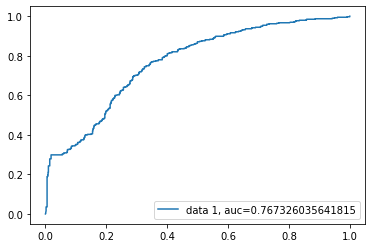

In [33]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# K-NN Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier

K=5

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
y_pred = knn.predict(X_test)

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7492378048780488


K = 7

In [38]:
knn = KNeighborsClassifier(n_neighbors=7)

In [39]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7583841463414634


# Support Vector Machines

In [41]:
from sklearn import svm

In [42]:
clf = svm.SVC(kernel='rbf')


In [43]:
clf.fit(X_train, y_train)

SVC()

In [44]:
y_pred = clf.predict(X_test)

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6989329268292683


In [46]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.0
Recall: 0.0


C:\Users\320118090\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
gnb = GaussianNB()

In [49]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7157012195121951


In [50]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.5763888888888888
Recall: 0.21012658227848102


In [51]:
from sklearn.ensemble import RandomForestClassifier
randomf = RandomForestClassifier(n_estimators=100)
randomf.fit(X_train,y_train)

# prediction on test set
y_pred=randomf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8460365853658537


In [52]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8025078369905956
Recall: 0.6481012658227848


In [53]:
from sklearn import datasets


In [54]:
feature_imp = pd.Series(randomf.feature_importances_, index = feature_cols).sort_values(ascending=False)
feature_imp

Annualized Net Value EUR    0.249092
Tenure                      0.114108
iCon Market_JAPAN           0.056507
Contract Year_2020          0.044494
Contract Month_April        0.039033
                              ...   
iCon Market_DACH            0.000247
BG_PD Other                 0.000213
Contract Year_2012          0.000195
BG_PDS                      0.000045
BG_D&T Other                0.000000
Length: 69, dtype: float64

No handles with labels found to put in legend.


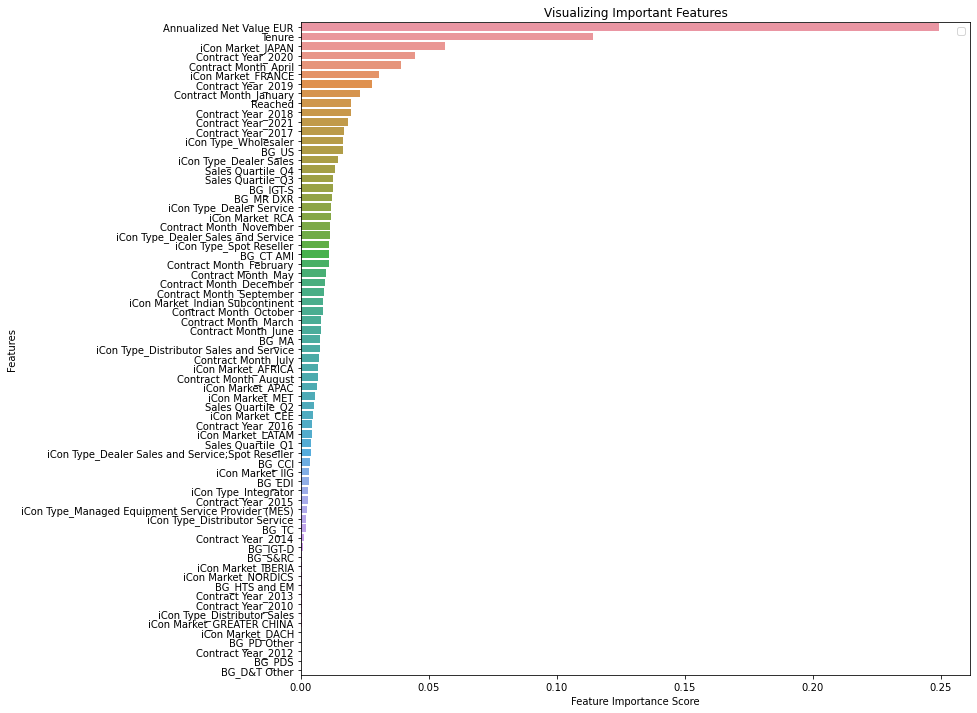

In [55]:
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(12,12))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Binary Encoding Categorical Varibles

In [56]:
# pip install category_encoders

In [57]:
data1 = data.copy()

In [58]:
import category_encoders as ce

In [59]:
encoder= ce.BinaryEncoder(cols=['iCon Market', 'iCon Type', 'BG', 'Contract Month', 'Contract Year'],return_df=True)

In [60]:
encoder

BinaryEncoder(cols=['iCon Market', 'iCon Type', 'BG', 'Contract Month',
                    'Contract Year'])

In [61]:
data_binary = encoder.fit_transform(data1)

C:\Users\320118090\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [62]:
data_binary.head()

,iCon Type_0,iCon Type_1,iCon Type_2,iCon Type_3,iCon Type_4,iCon Market_0,iCon Market_1,iCon Market_2,iCon Market_3,iCon Market_4,...,Contract Month_2,Contract Month_3,Contract Month_4,End Date,Tenure,Contract End Year,Reached,Churn,Annualized Net Value EUR,Sales Quartile
0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,2021-04-30,4,2021,1,0,25230.26,Q4
1,0,0,0,0,1,0,0,0,0,1,...,0,1,0,2021-03-31,12,2021,1,0,29499.94,Q4
2,0,0,0,0,1,0,0,0,0,1,...,0,1,0,2021-03-31,12,2021,1,0,53290.21,Q4
3,0,0,0,0,1,0,0,0,0,1,...,0,1,1,2021-03-31,6,2021,1,0,16698.95,Q4
4,0,0,0,0,1,0,0,0,0,1,...,0,1,0,2021-03-31,12,2021,1,0,29459.58,Q4


In [63]:
for col in data_binary.columns:
    print(col)

iCon Type_0
iCon Type_1
iCon Type_2
iCon Type_3
iCon Type_4
iCon Market_0
iCon Market_1
iCon Market_2
iCon Market_3
iCon Market_4
BG_0
BG_1
BG_2
BG_3
BG_4
Contract Date
Contract Year_0
Contract Year_1
Contract Year_2
Contract Year_3
Contract Year_4
Start Date
Contract Month_0
Contract Month_1
Contract Month_2
Contract Month_3
Contract Month_4
End Date
Tenure
Contract End Year
Reached
Churn
Annualized Net Value EUR
Sales Quartile


In [64]:
data_binary = pd.get_dummies(data_binary,columns=['Sales Quartile'],prefix='Sales Quartile')

In [65]:
for col in data_binary.columns:
    print(col)

iCon Type_0
iCon Type_1
iCon Type_2
iCon Type_3
iCon Type_4
iCon Market_0
iCon Market_1
iCon Market_2
iCon Market_3
iCon Market_4
BG_0
BG_1
BG_2
BG_3
BG_4
Contract Date
Contract Year_0
Contract Year_1
Contract Year_2
Contract Year_3
Contract Year_4
Start Date
Contract Month_0
Contract Month_1
Contract Month_2
Contract Month_3
Contract Month_4
End Date
Tenure
Contract End Year
Reached
Churn
Annualized Net Value EUR
Sales Quartile_Q1
Sales Quartile_Q2
Sales Quartile_Q3
Sales Quartile_Q4


In [66]:
feature_cols = ['BG_0', 'BG_1', 'BG_2', 'BG_3', 'BG_4', 'iCon Type_0' ,'iCon Type_1', 'iCon Type_2', 'iCon Type_3',
                'iCon Type_4', 'iCon Market_0', 'iCon Market_1','iCon Market_2', 'iCon Market_3', 'iCon Market_4',
                'Contract Year_0', 'Contract Year_1', 'Contract Year_2', 'Contract Year_3', 'Contract Year_4',
                'Contract Month_0', 'Contract Month_1', 'Contract Month_2', 'Contract Month_3', 'Contract Month_4', 
                'Sales Quartile_Q1', 'Sales Quartile_Q2','Sales Quartile_Q3', 'Sales Quartile_Q4', 'Tenure', 
                'Reached']

In [67]:
X1 = data_binary[feature_cols]
y1 = data_binary['Churn']
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.20,random_state=25)

In [68]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

# Logistic Regression with Binary Encoding

In [69]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state = 25)
logreg.fit(X1_train, y1_train)
y1_pred = logreg.predict(X1_test)
cnf_matrix = metrics.confusion_matrix(y1_test, y1_pred)
cnf_matrix

print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))
print("F1-score:",metrics.f1_score(y1_test, y1_pred))


Accuracy: 0.770579268292683
Precision: 0.674074074074074
Recall: 0.4607594936708861
F1-score: 0.5473684210526316


# k-NN Classifier with Binary Encoding

In [70]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X1_train, y1_train)
y1_pred = knn.predict(X1_test)

print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))
print("F1-score:",metrics.f1_score(y1_test, y1_pred))

Accuracy: 0.8246951219512195
Precision: 0.7935943060498221
Recall: 0.5645569620253165
F1-score: 0.6597633136094675


In [71]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X1_train, y1_train)
y1_pred = knn.predict(X1_test)

print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))
print("F1-score:",metrics.f1_score(y1_test, y1_pred))


Accuracy: 0.8307926829268293
Precision: 0.7836065573770492
Recall: 0.6050632911392405
F1-score: 0.6828571428571428


In [72]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [73]:
clf = GridSearchCV(knn, hyperparameters, cv=5)
bestknn_model = clf.fit(X1_train,y1_train)

In [74]:
#Best Hyperparameters Value
print('Best leaf_size:', bestknn_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', bestknn_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', bestknn_model.best_estimator_.get_params()['n_neighbors'])
#Predict testing set
y1_pred = bestknn_model.predict(X1_test)
#Check performance using accuracy
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

Best leaf_size: 1
Best p: 1
Best n_neighbors: 4
Accuracy: 0.8262195121951219


# Random Forests with Binary Encoding

In [75]:
randomf = RandomForestClassifier(n_estimators=100, random_state = 25)
randomf.fit(X1_train,y1_train)

# prediction on test set
y1_pred=randomf.predict(X1_test)

print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))
print("F1-score:",metrics.f1_score(y1_test, y1_pred))

Accuracy: 0.8422256097560976
Precision: 0.8133333333333334
Recall: 0.6177215189873417
F1-score: 0.702158273381295


In [76]:
feature_imp = pd.Series(randomf.feature_importances_, index = feature_cols).sort_values(ascending=False)
feature_imp

Tenure               0.178331
Contract Year_3      0.069364
iCon Market_3        0.060585
Contract Year_4      0.059930
Contract Month_3     0.058812
Contract Month_4     0.045240
Contract Month_1     0.045110
Contract Year_2      0.040999
Contract Month_2     0.040621
iCon Market_2        0.040437
iCon Market_1        0.039457
iCon Market_4        0.038484
iCon Type_2          0.035169
iCon Type_3          0.035075
BG_4                 0.034602
BG_3                 0.031458
Reached              0.029756
iCon Type_4          0.024844
BG_2                 0.023823
Sales Quartile_Q4    0.019837
Sales Quartile_Q3    0.018016
iCon Type_1          0.007914
Sales Quartile_Q2    0.007307
Sales Quartile_Q1    0.005179
Contract Year_1      0.005051
BG_1                 0.004600
BG_0                 0.000000
Contract Month_0     0.000000
iCon Market_0        0.000000
iCon Type_0          0.000000
Contract Year_0      0.000000
dtype: float64

In [77]:
features = [ 'iCon Type_0' ,'iCon Type_1', 'iCon Type_2', 'iCon Type_3',
                'iCon Type_4', 'iCon Market_0', 'iCon Market_1','iCon Market_2', 'iCon Market_3', 'iCon Market_4',
                'Contract Year_0', 'Contract Year_1', 'Contract Year_2', 'Contract Year_3', 'Contract Year_4',
                'Contract Month_0', 'Contract Month_1', 'Contract Month_2', 'Contract Month_3', 'Contract Month_4', 
                 'Tenure', 'Reached']


In [78]:
X2 = data_binary[features]
y2 = data_binary['Churn']
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.20,random_state=25)

In [79]:
randomf = RandomForestClassifier(n_estimators=180, random_state = 25)
randomf.fit(X2_train,y2_train)

# prediction on test set
y2_pred=randomf.predict(X2_test)

print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("Precision:",metrics.precision_score(y2_test, y2_pred))
print("Recall:",metrics.recall_score(y2_test, y2_pred))
print("F1-score:",metrics.f1_score(y2_test, y2_pred))

Accuracy: 0.8620426829268293
Precision: 0.8543046357615894
Recall: 0.6531645569620254
F1-score: 0.7403156384505021


In [80]:
rfc = RandomForestClassifier(random_state = 25)
parameters = {
    "n_estimators":[10, 20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,None],
    "max_depth":[2,4,8,16,32,None]
    
}

In [81]:
cv = GridSearchCV(rfc,parameters,cv=5)
bestrf_model = cv.fit(X2_train, y2_train)

print('N_estimators:', bestrf_model.best_estimator_.get_params()['n_estimators'])
print('Max_depth:', bestrf_model.best_estimator_.get_params()['max_depth'])
#Predict testing set
y2_pred = bestrf_model.predict(X2_test)
#Check performance using accuracy
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("Precision:",metrics.precision_score(y2_test, y2_pred))
print("Recall:",metrics.recall_score(y2_test, y2_pred))
print("F1-score:",metrics.f1_score(y2_test, y2_pred))

C:\Users\320118090\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\320118090\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\320118090\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 349, in fit
    self._validate_estimator()
  File "C:\Users\320118090\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 129, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'NoneType'>.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\320118090\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fa

C:\Users\320118090\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\320118090\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\320118090\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 349, in fit
    self._validate_estimator()
  File "C:\Users\320118090\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 129, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'NoneType'>.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\320118090\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fa

C:\Users\320118090\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\320118090\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\320118090\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 349, in fit
    self._validate_estimator()
  File "C:\Users\320118090\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 129, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'NoneType'>.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\320118090\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fa

N_estimators: 20
Max_depth: 16
Accuracy: 0.854420731707317
Precision: 0.8311688311688312
Recall: 0.6481012658227848
F1-score: 0.728307254623044


# SVM with Binary Encoding

In [82]:
clf = svm.SVC(kernel='linear', random_state = 25)
clf.fit(X1_train, y1_train)
y1_pred = clf.predict(X1_test)

print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))
print("F1-score:",metrics.f1_score(y1_test, y1_pred))

Accuracy: 0.7850609756097561
Precision: 0.6928327645051194
Recall: 0.5139240506329114
F1-score: 0.5901162790697674


In [83]:
clf = svm.SVC(kernel='rbf', random_state = 25)
clf.fit(X1_train, y1_train)
y1_pred = clf.predict(X1_test)

print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))
print("F1-score:",metrics.f1_score(y1_test, y1_pred))

Accuracy: 0.8239329268292683
Precision: 0.8203125
Recall: 0.5316455696202531
F1-score: 0.6451612903225806


In [84]:
clf = svm.SVC(kernel='poly', random_state = 25)
clf.fit(X1_train, y1_train)
y1_pred = clf.predict(X1_test)

print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))
print("F1-score:",metrics.f1_score(y1_test, y1_pred))

Accuracy: 0.8285060975609756
Precision: 0.8455284552845529
Recall: 0.5265822784810127
F1-score: 0.6489859594383776


# Naive Baiyes with Binary Encoding

In [85]:
gnb.fit(X1_train,y1_train)
y1_pred = gnb.predict(X1_test)

print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))
print("F1-score:",metrics.f1_score(y1_test, y1_pred))

Accuracy: 0.6996951219512195
Precision: 0.5010438413361169
Recall: 0.6075949367088608
F1-score: 0.5491990846681921


# New Data: Contract + Equipment

In [106]:
new_data.drop(['CONTRACT_ID'], axis=1)

,Sold_To_Party,Modality,Market,ContractType,DurationInDays,START_DATE,END_DATE,Main_Equipment_Age_Bucket_In_Years,Sales_Year,Contract_Month,Churn,SALES_VALUE_EUR,Sales Quartile,Partner Type,EOL_Reached
0,340168,AMI,AFI,SILVER,365,2017-04-01,2018-03-31,11-15 years,2018,April,0,1170.84,Q4,Distributor Sales and Service,0
1,340168,AMI,AFI,SILVER,365,2017-03-01,2018-02-28,11-15 years,2018,March,0,1051.71,Q4,Distributor Sales and Service,0
2,842044,IGT-S Fixed,CEE,SILVER,1826,2014-03-12,2019-03-11,16+ years,2018,March,1,1119.44,Q4,Distributor Sales and Service,0
3,340168,AMI,AFI,SILVER,366,2019-03-01,2020-02-29,11-15 years,2020,March,1,1170.13,Q4,Distributor Sales and Service,0
4,340168,AMI,AFI,SILVER,365,2017-08-23,2018-08-22,11-15 years,2018,August,0,6341.08,Q4,Distributor Sales and Service,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175,197439,DXR,MET,SILVER,365,2021-01-01,2021-12-31,16+ years,2021,January,1,8611.11,Q4,Distributor Sales and Service,1
6176,197439,AMI,MET,SILVER,365,2021-01-01,2021-12-31,1-3 years,2021,January,1,6027.78,Q4,Distributor Sales and Service,0
6177,94105498,MR,JPN,PROTECTION,90,2021-01-01,2021-03-31,4-5 years,2021,January,0,10488.87,Q4,Spot Reseller,0
6178,94603992,IGT MoS,MET,VALUE,365,2021-01-01,2021-12-31,4-5 years,2021,January,1,75.85,Q3,Dealer Sales,0


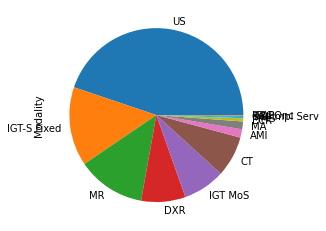

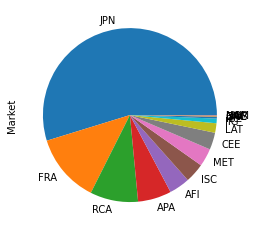

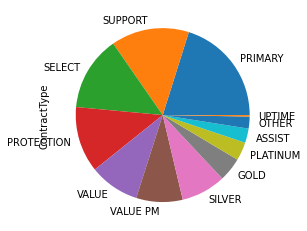

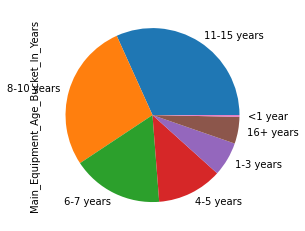

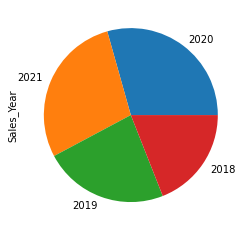

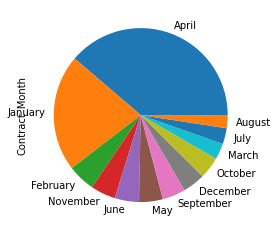

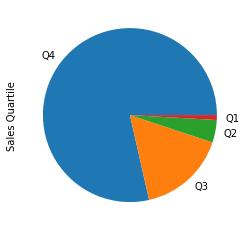

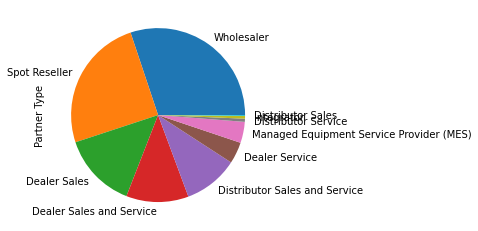

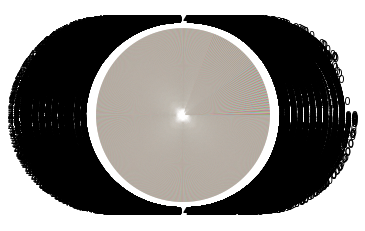

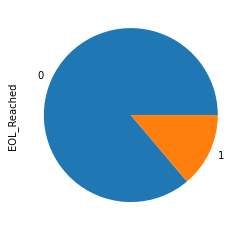

In [99]:
for col in new_data.select_dtypes('object'):
    plt.figure()
    new_data[col].value_counts().plot.pie()

C:\Users\320118090\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALES_VALUE_EUR', ylabel='Density'>

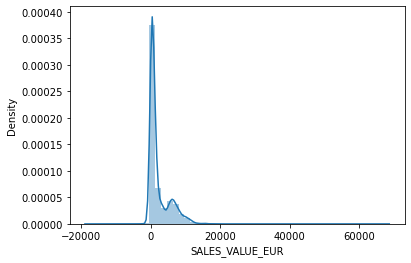

In [103]:
plt.figure()
sns.distplot(new_data['SALES_VALUE_EUR'])

C:\Users\320118090\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DurationInDays', ylabel='Density'>

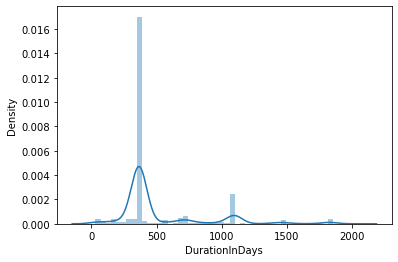

In [104]:
plt.figure()
sns.distplot(new_data['DurationInDays'])

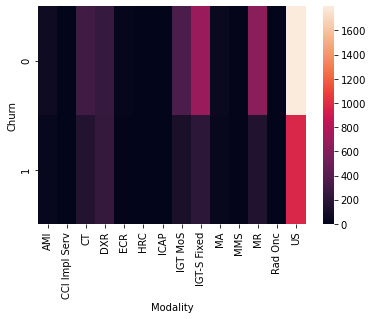

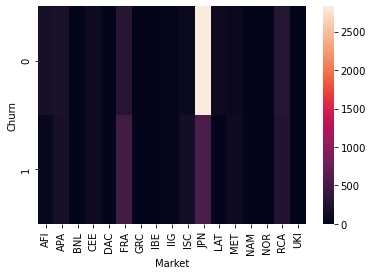

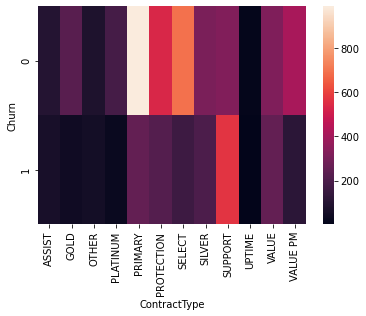

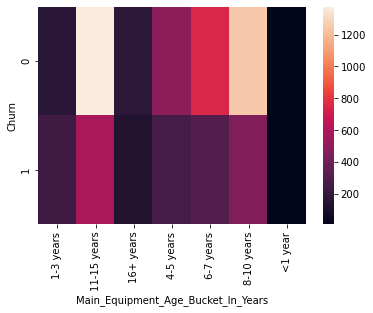

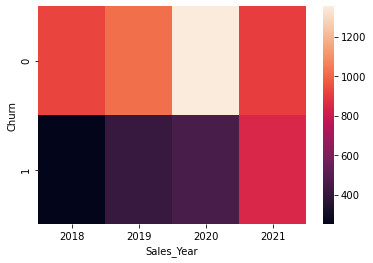

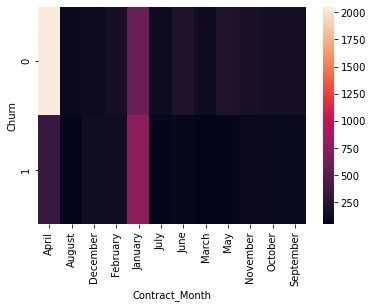

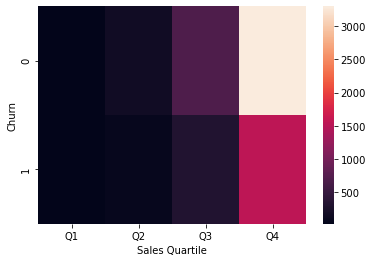

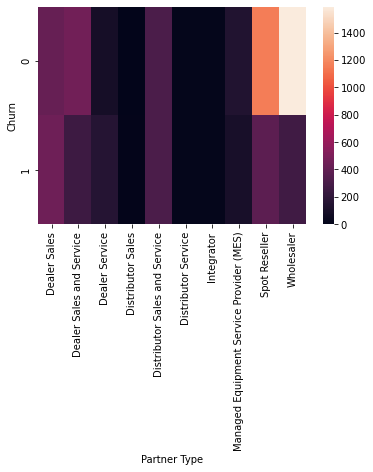

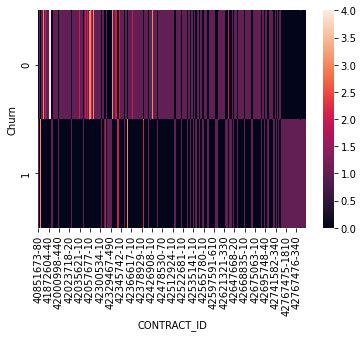

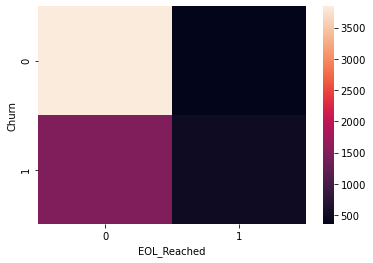

In [105]:
for col in new_data.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(new_data['Churn'], new_data[col]), fmt='d')

In [107]:
new_target_count = new_data.Churn.value_counts()

Class 0: 4201
Class 1: 1979
Proportion: 2.12 : 1


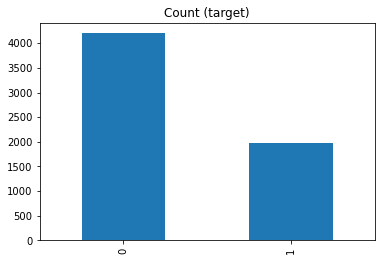

In [108]:

print('Class 0:', new_target_count[0])
print('Class 1:', new_target_count[1])
print('Proportion:', round(new_target_count[0] / new_target_count[1], 2), ': 1')

new_target_count.plot(kind='bar', title='Count (target)');

In [112]:
new_nominal_features = ['Modality', 'Market', 'ContractType', 'Main_Equipment_Age_Bucket_In_Years', 
                               'EOL_Reached', 'Sales Quartile', 'Partner Type'] 

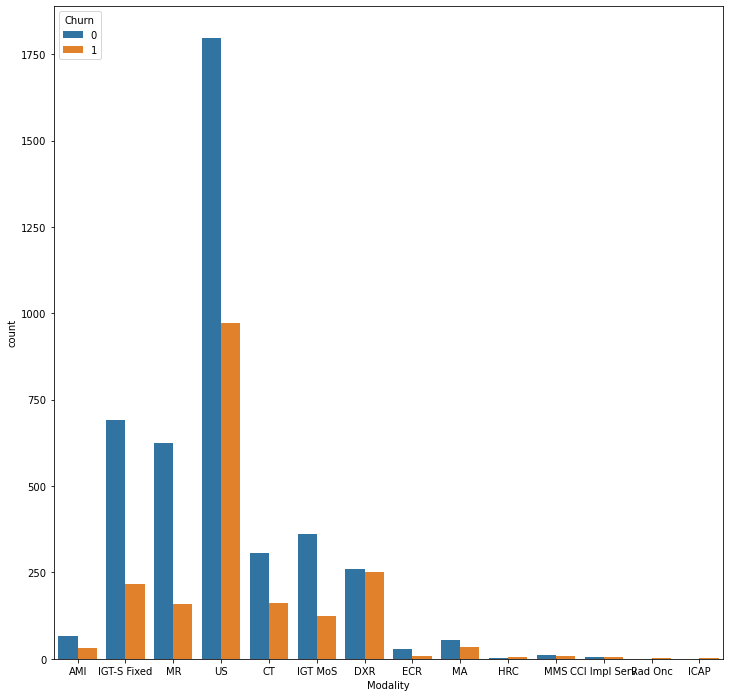

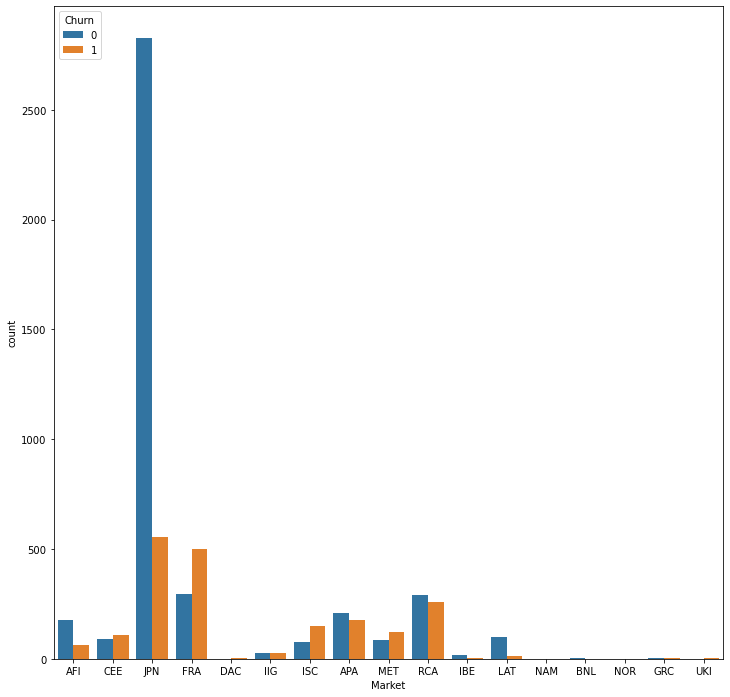

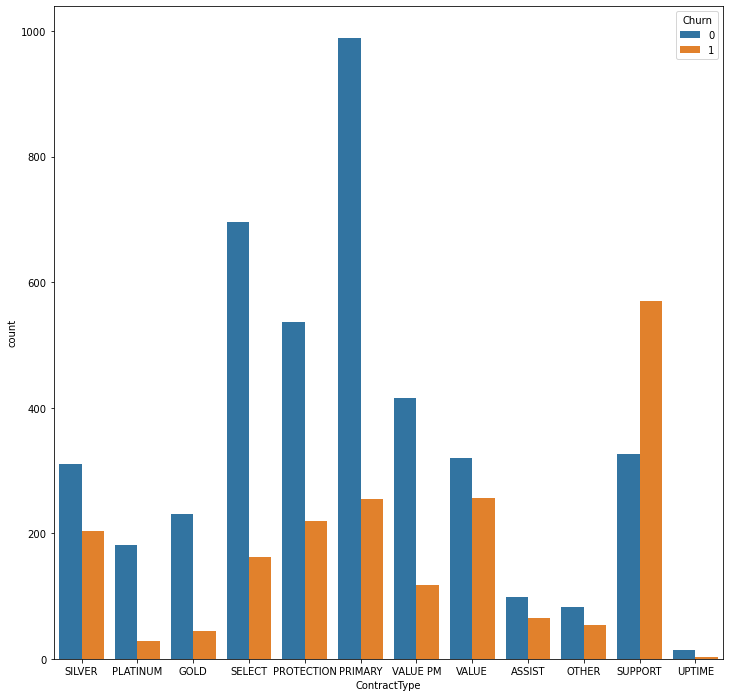

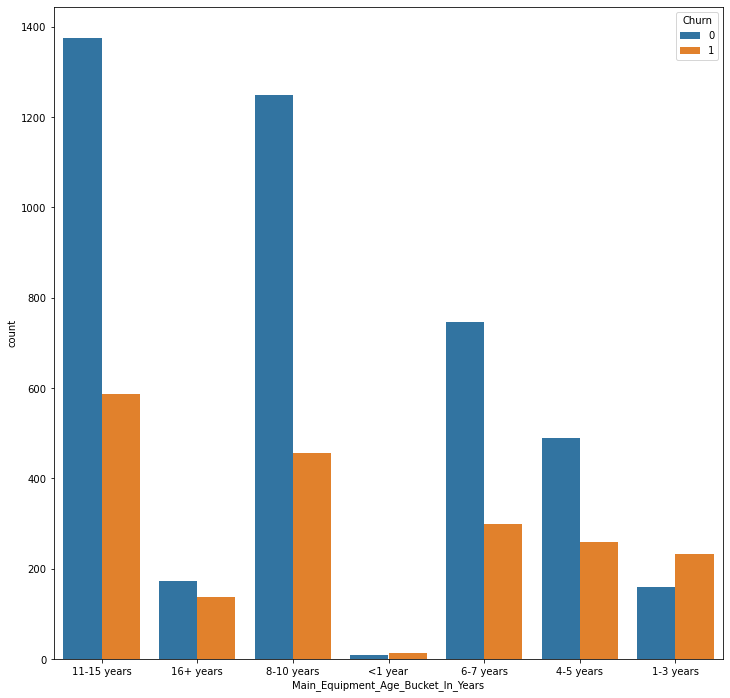

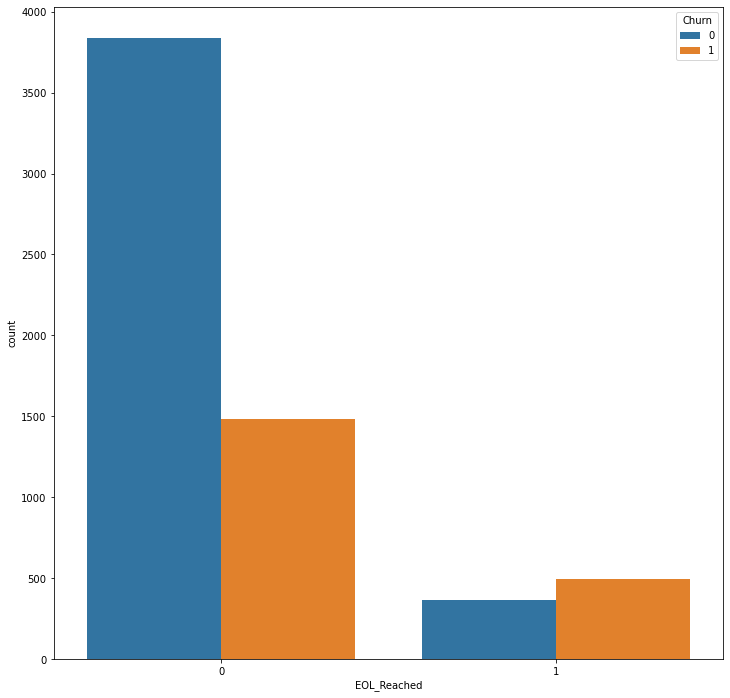

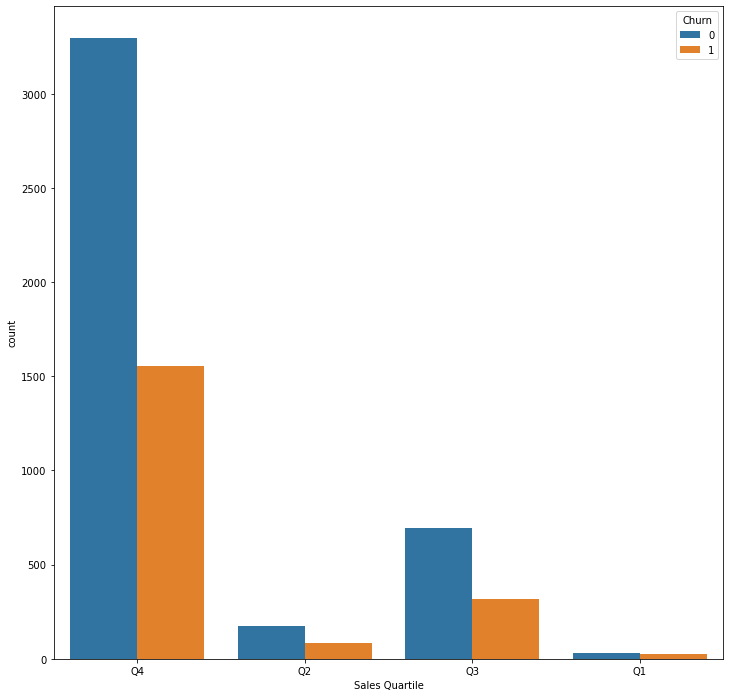

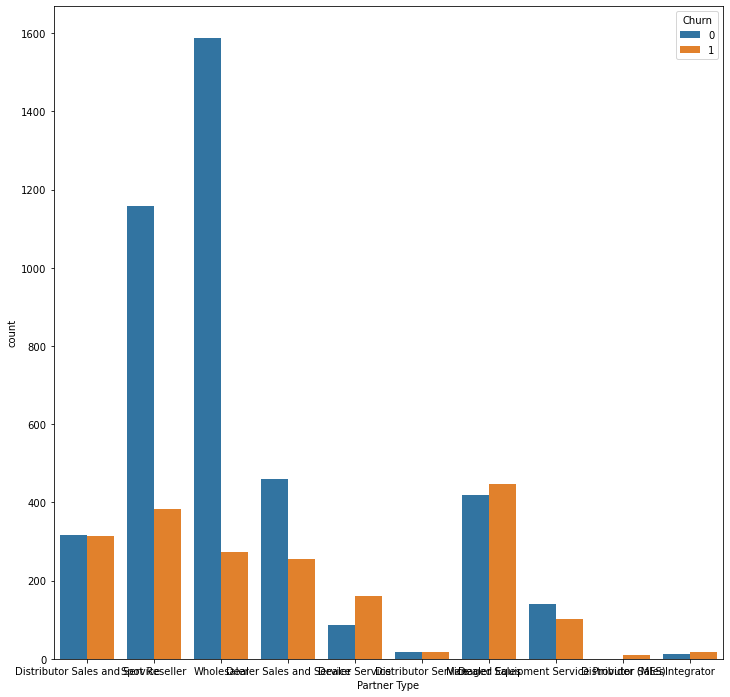

In [116]:

for col in new_nominal_features:
    plt.figure(figsize=(12,12))
    sns.countplot(x=col, hue='Churn', data=new_data)

In [117]:
data2 = new_data.copy()

In [118]:
encoder2 = ce.BinaryEncoder(cols=['Modality', 'Partner Type', 'Market', 'ContractType', 
                                  'Main_Equipment_Age_Bucket_In_Years', 'Sales Quartile',
                                 'Sales_Year', 'Contract_Month'],return_df=True)

In [119]:
data_binary2 = encoder2.fit_transform(data2)

C:\Users\320118090\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [122]:
data_binary2 = data_binary2.drop(['Sold_To_Party', 'START_DATE', 'END_DATE', 'CONTRACT_ID'], axis=1)

In [1]:
for col in data_binary2.columns:
    print(col)

NameError: name 'data_binary2' is not defined

In [128]:
features = ['Modality_0', 'Modality_1', 'Modality_2','Modality_3', 'Modality_4', 'Market_0', 'Market_1',
                        'Market_2', 'Market_3', 'Market_4', 'Market_5', 'ContractType_0' , 'ContractType_1',
                        'ContractType_2', 'ContractType_3', 'ContractType_4', 'DurationInDays', 
                        'Main_Equipment_Age_Bucket_In_Years_0', 'Main_Equipment_Age_Bucket_In_Years_1',
                        'Main_Equipment_Age_Bucket_In_Years_2', 'Main_Equipment_Age_Bucket_In_Years_3',
                        'Sales_Year_0', 'Sales_Year_1', 'Sales_Year_2', 'Contract_Month_0', 'Contract_Month_1',
                        'Contract_Month_2', 'Contract_Month_3', 'Contract_Month_4', 'SALES_VALUE_EUR',
                        'Sales Quartile_0', 'Sales Quartile_1', 'Sales Quartile_2', 'Partner Type_0',
                        'Partner Type_1', 'Partner Type_2', 'Partner Type_3', 'Partner Type_4', 'EOL_Reached']
newX = data_binary2[features]
newy = data_binary2['Churn']
newX_train,newX_test,newy_train,newy_test=train_test_split(newX,newy,test_size=0.20,random_state=25)

In [129]:
sc = StandardScaler()
newX_train = sc.fit_transform(newX_train)
newX_test = sc.transform(newX_test)

In [131]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state = 25)
logreg.fit(newX_train, newy_train)
newy_pred = logreg.predict(newX_test)
cnf_matrix = metrics.confusion_matrix(newy_test, newy_pred)
cnf_matrix

print("Accuracy:",metrics.accuracy_score(newy_test, newy_pred))
print("Precision:",metrics.precision_score(newy_test, newy_pred))
print("Recall:",metrics.recall_score(newy_test, newy_pred))
print("F1-score:",metrics.f1_score(newy_test, newy_pred))

Accuracy: 0.7467637540453075
Precision: 0.67578125
Recall: 0.4292803970223325
F1-score: 0.5250379362670713


In [132]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(newX_train, newy_train)
newy_pred = knn.predict(newX_test)

print("Accuracy:",metrics.accuracy_score(newy_test, newy_pred))
print("Precision:",metrics.precision_score(newy_test, newy_pred))
print("Recall:",metrics.recall_score(newy_test, newy_pred))
print("F1-score:",metrics.f1_score(newy_test, newy_pred))

Accuracy: 0.8292880258899676
Precision: 0.8221476510067114
Recall: 0.607940446650124
F1-score: 0.6990014265335235


In [ ]:
clf = GridSearchCV(knn, hyperparameters, cv=5)
newbestknn_model = clf.fit(newX_train, newy_train)

In [ ]:
#Best Hyperparameters Value
print('Best leaf_size:', newbestknn_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', newbestknn_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', newbestknn_model.best_estimator_.get_params()['n_neighbors'])
#Predict testing set
newy_pred = newbestknn_model.predict(newX_test)
#Check performance using accuracy
print("Accuracy:",metrics.accuracy_score(newy_test, newy_pred))